In [255]:
import numpy as np
import sys
import os
from array import array

from struct import *
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm

#파일 읽기
train_image = open('C:/Users/admin/Desktop/git/Machine-Learning/MNIST/raw/train-images.idx3-ubyte','rb')
train_label = open('C:/Users/admin/Desktop/git/Machine-Learning/MNIST/raw/train-labels.idx1-ubyte','rb')

#사용할 변수 초기화
img = np.zeros((28,28)) #이미지가 저장될 부분
trainset = [ [],[],[],[],[],[],[],[],[],[] ] #숫자별로 저장 (0 ~ 9)
d = 0
l = 0
index=0

s = train_image.read(16)    #read first 16byte
l = train_label.read(8)     #read first  8byte






k=0 #테스트용 index
#read mnist and show number
while True:    
    s = train_image.read(784) #784바이트씩 읽음
    l = train_label.read(1) #1바이트씩 읽음

    if not s:
        break;
    if not l:
        break;

    index = int(l[0])
    #print(k,":",index)

#unpack
    img = np.reshape( unpack(len(s)*'B',s), (28,28))
    trainset[index].append(img) #각 숫자영역별로 해당이미지를 추가
    k=k+1

# MNIST 불러고는 코드 출처 : https://m.blog.naver.com/PostView.nhn?blogId=acwboy&logNo=220584307823&proxyReferer=https:%2F%2Fwww.google.com%2F

In [256]:
#파일 읽기
test_image = open('C:/Users/admin/Desktop/git/Machine-Learning/MNIST/raw/t10k-images.idx3-ubyte','rb')
test_label = open('C:/Users/admin/Desktop/git/Machine-Learning/MNIST/raw/t10k-labels.idx1-ubyte','rb')

#사용할 변수 초기화
img = np.zeros((28,28)) #이미지가 저장될 부분
testset = [ [],[],[],[],[],[],[],[],[],[] ] #숫자별로 저장 (0 ~ 9)
d = 0
l = 0
index=0

s = test_image.read(16)    #read first 16byte
l = test_label.read(8)     #read first  8byte






k=0 #테스트용 index
#read mnist and show number
while True:    
    s = test_image.read(784) #784바이트씩 읽음
    l = test_label.read(1) #1바이트씩 읽음

    if not s:
        break;
    if not l:
        break;

    index = int(l[0])
    #print(k,":",index)

#unpack
    img = np.reshape( unpack(len(s)*'B',s), (28,28))
    testset[index].append(img) #각 숫자영역별로 해당이미지를 추가
    k=k+1

# MNIST 불러고는 코드 출처 : https://m.blog.naver.com/PostView.nhn?blogId=acwboy&logNo=220584307823&proxyReferer=https:%2F%2Fwww.google.com%2F

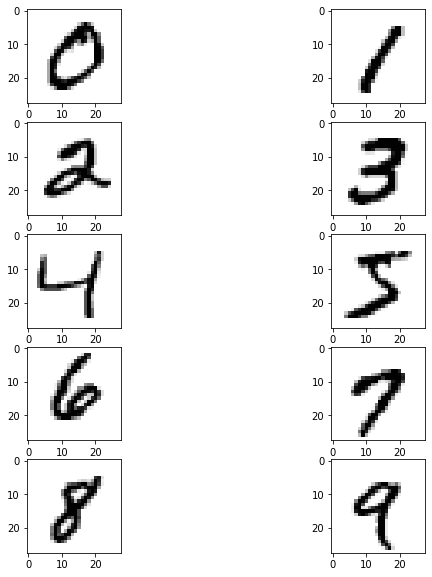

In [257]:
fig = plt.figure(figsize=(10,10))
for i in range(0,10):
    img = trainset[i][0]
    fig.add_subplot(5,2,i+1)
    plt.imshow(img, cmap = cm.binary)
plt.show()

In [258]:
X_train=[]
X_test=[]
y_train=[]
y_test=[]

for i in range(10):
    X_train.extend(np.array(trainset[i]))
    X_test.extend(np.array(testset[i]))
    for j in range(len(trainset[i])):
        y_train.append(encoding(i))
    for j in range(len(testset[i])):
        y_test.append(encoding(i))


        
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train).transpose()
y_test = np.array(y_test).transpose()

In [259]:
import math

def randInitialWeight(input_layer, output_layer):
    W = np.random.rand(output_layer, input_layer+1)
    return W

# def log(x): #input type = np.ndarray, return type = np.ndarray
#     g=np.zeros(x.shape)
#     for i in range(x.shape[0]):
#         for j in range(x.shape[1]):
#             try:
#                 g[i][j]=math.log(x[i][j])
#             except OverflowError:
#                 g[i][j] = float('inf')
#     return g

def log(x):
    g = np.zeros(x.shape)
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            g[i][j] = np.log(x[i][j])
    return g



def sigmoid(z):
    if(type(z)!=np.ndarray):
        try:
            return 1/(1+math.exp(-z))
        except OverflowError:
            return float('inf')
        
    elif(len(z.shape)==1):
        g=np.zeros(z.shape)
        for i in range(z.shape[0]):
            try:
                g[i]=1/(1+math.exp(-z[i]))
            except OverflowError:
                g[i]=float('inf')
        return g
    else:
        g=np.zeros(z.shape)
        for i in range(z.shape[0]):
            for j in range(z.shape[1]):
                try:
                    g[i][j]=1/(1+math.exp(-z[i][j]))
                except OverflowError:
                    g[i][j]=float('inf')
        return g

def sigmoidGradient(z):
    a=sigmoid(z)
    b=1-sigmoid(z)
    return a*b

def relu(z):
    if(type(z)!=np.ndarray):
        if(z<0):
            return 0
        else:
            return z
        
    elif(len(z.shape)==1):
        g=np.zeros(z.shape)
        for i in range(z.shape[0]):
            if(z[i]<0):
                g[i]=0
            else:
                g[i]=z[i]
        return g
    else:
        g=np.zeros(z.shape)
        for i in range(z.shape[0]):
            for j in range(z.shape[1]):
                if(z[i][j]<0):
                    g[i][j]=0
                else:
                    g[i][j]=z[i][j]
        return g
    
def reluGradient(z):
    if(type(z)!=np.ndarray):
        if(z<0):
            return 0
        else:
            return 1
        
    elif(len(z.shape)==1):
        g=np.zeros(z.shape)
        for i in range(z.shape[0]):
            if(z[i]<0):
                g[i]=0
            else:
                g[i]=1
        return g
    else:
        g=np.zeros(z.shape)
        for i in range(z.shape[0]):
            for j in range(z.shape[1]):
                if(z[i][j]<0):
                    g[i][j]=0
                else:
                    g[i][j]=1
        return g
    
def softmax(z):
    if(len(z.shape)==1 or (len(z.shape)==2) and z.shape[1]==1):
        res=[]
        exp = []
        for i in range(len(z)):
            exp.append(np.exp(z[i])-z.max())
        for i in range(len(z)):
            res.append(exp[i]/sum(exp))
        return res
    else:
        
        
        exp = np.zeros([z.shape[0], z.shape[1]])
        res = np.zeros([z.shape[0], z.shape[1]])
        for i in range(z.shape[0]):
            for j in range(z.shape[1]):
                exp[i][j]=np.exp(z[i][j] - z.max(axis=0)[j])
        for i in range(z.shape[0]):
            for j in range(z.shape[1]):
                res[i][j] = exp[i][j]/exp.sum(axis=0)[j]
        return res
                

def encoding(n):
    res=[0,0,0,0,0,0,0,0,0,0]
    res[n] = 1
    return res

def Convert1Dim(X): #reshape Variable to 1 dimensional vector. input : [n, m], output : [n*m]
    if(len(X.shape)==2):
        return X.reshape([X.shape[0]*X.shape[1]])
    elif(len(X.shape)==3):
        return X.reshape([X.shape[0], X.shape[1]*X.shape[2]])
    
def insertbias(X):

    return np.insert(X, 0, 1).reshape(X.shape[0]+1,)

def addBias(X):
    res = []
    for i in range(len(X)):
        res.append(insertbias(X[i]))
        
    return np.array(res)
        
    
def costFunction_sigmoid(X, y, theta1, theta2,  Lambda=0, input_layer_size=784, hidden_layer_size=40, num_labels=10): #Gradient Vanishing problem 야기

    m = Convert1Dim(X_train).shape[0]
    Theta1_grad = np.zeros(theta1.shape)
    Theta2_grad = np.zeros(theta2.shape)
    
    a1 = addBias(Convert1Dim(X)).transpose() #785 X m. containing bias\

    z1 = theta1.dot(a1) # (40X785) * (785Xm) = (40Xm)
    
    a2 = addBias(sigmoid(z1).transpose()).transpose() # (41Xm)
    z2 = theta2.dot(a2) # (10X41) * (41Xm) = (10Xm)
    a3 = sigmoid(z2) # (10Xm)

    
    #y : 10Xm
    
    #J=(1/m)*(-(np.dot(y.transpose(), log(a3))).sum() - (np.dot((1-y).transpose(), log(1-a3)).sum()))
    J=(1/m)*(-(y*log(a3)).sum() - (((1-y)*log(1-a3)).sum())) 
    # 한꺼번에 모든 데이터로 학습시킬 경우 메모리 문제가 발생한다. 
    # 특히 손실함수를 계산할 때 47995X47995 사이즈의 매트릭스를 메모리에 적재하게 되어, RAM에 약 16GB의 여유 공간이 필요하다.
    # 따라서 Batch size 개념이 중요하는 사실을 알게 되었다.
    
    R_term = (Lambda/(2*m))*((theta1[:,1:]**2).sum() + (theta2[:,1:]**2).sum())
    J+=R_term
    
    delta3 = a3-y # 10Xm
    delta2 = (np.dot(delta3.transpose(), theta2))*addBias(sigmoidGradient(z1.transpose()))     #(mx41)*(mx41)=(mX41)
    
    D1 = delta2[:, 1:].transpose().dot(a1.transpose())
    D2 = delta3.dot(a2.transpose())
    
    Theta1_grad+=(1/m)*D1
    Theta2_grad+=(1/m)*D2
    
    Theta1_grad[:,1:]+=(Lambda/m)*theta1[:,1:]
    Theta2_grad[:,1:]+=(Lambda/m)*theta2[:,1:]
    
    return J, Theta1_grad, Theta2_grad

def costFunction_ReLu(X, y, theta1, theta2,  Lambda=0, input_layer_size=784, hidden_layer_size=40, num_labels=10): #Gradient Vanishing problem 야기
    
    m = Convert1Dim(X_train).shape[0]
    Theta1_grad = np.zeros(theta1.shape)
    Theta2_grad = np.zeros(theta2.shape)
    
    a1 = addBias(Convert1Dim(X)).transpose() #785 X m. containing bias\

    z1 = theta1.dot(a1) # (40X785) * (785Xm) = (40Xm)
    
    a2 = addBias(relu(z1).transpose()).transpose() # (41Xm)
    z2 = theta2.dot(a2) # (10X41) * (41Xm) = (10Xm)

    a3 = softmax(z2) # (10Xm)
    
    #y : 10Xm
    
    #J=(1/m)*(-(np.dot(y.transpose(), log(a3))).sum() - (np.dot((1-y).transpose(), log(1-a3)).sum()))
    J=(1/m)*(-(y*log(a3+1e-7)).sum() - (((1-y)*log(1-a3+1e-7)).sum())) 
    # 한꺼번에 모든 데이터로 학습시킬 경우 메모리 문제가 발생한다. 
    # 특히 손실함수를 계산할 때 47995X47995 사이즈의 매트릭스를 메모리에 적재하게 되어, RAM에 약 16GB의 여유 공간이 필요하다.
    # 따라서 Batch size 개념이 중요하는 사실을 알게 되었다.
    
    R_term = (Lambda/(2*m))*((theta1[:,1:]**2).sum() + (theta2[:,1:]**2).sum())
    J+=R_term
    
    delta3 = a3-y # 10Xm
    delta2 = (np.dot(delta3.transpose(), theta2))*addBias(reluGradient(z1.transpose()))     #(mx41)*(mx41)=(mX41)
    
    D1 = delta2[:, 1:].transpose().dot(a1.transpose())
    D2 = delta3.dot(a2.transpose())
    
    Theta1_grad+=(1/m)*D1
    Theta2_grad+=(1/m)*D2
    
    Theta1_grad[:,1:]+=(Lambda/m)*theta1[:,1:]
    Theta2_grad[:,1:]+=(Lambda/m)*theta2[:,1:]
    
    return J, Theta1_grad, Theta2_grad

def train(X, y):
    #Theta1= randInitialWeight(784, 40)
    #Theta2 = randInitialWeight(40, 10)
    #Theta1 = np.zeros([40, 785]) 
    #Theta2 = np.zeros([10, 41]) #theta를 모두 0으로 초기화했더니, theta값들이 같게 나오는 문제가 생김
    
    Theta1 = np.random.randn(40, 785)/math.sqrt(40/2) #HE initialization
    Theta2 = np.random.randn(10, 41)/math.sqrt(10/2) #HE initialization
    Js=[]
    for epoch in range(epochs):
        J=0
        s=time.time()

        for iteration in range(iterations):
            index=np.random.choice(X_train.shape[0], batch_size, replace=False)
            J_temp, tg1, tg2 = costFunction_ReLu(X[index], y.transpose()[index].transpose(), Theta1, Theta2, Lambda=0.1)
            J+=J_temp
            Theta1-=lr*tg1
            Theta2-=lr*tg2

        Js.append(J)
        print("epoch:",epoch, "-> cost:", J, "time:", time.time()-s)
    return Theta1, Theta2, Js
    


def predict(X, theta1, theta2):

    a1 = addBias(Convert1Dim(X).reshape(1,784)).transpose() #785 X 1. containing bias

    z1 = theta1.dot(a1) # (40X785) * (785X1) = (40X1)
    
    a2 = addBias(relu(z1).transpose()).transpose() # (41X1)

    z2 = theta2.dot(a2) # (10X41) * (41X1) = (10X1)

    a3 = softmax(z2) # (10X1)
    
    return a3

In [32]:
#parameter setting & training
#after normalization
#no regularization

import time

batch_size = 128
iterations = X_train.shape[0]//batch_size

epochs = 150
lr = 0.4 #learning rate

print("training iteration:", iterations)

s=time.time()
theta1, theta2, J = train(X_train/255, y_train)
print(time.time()-s)

training iteration: 468
epoch: 0 -> cost: 4.782258948442557 time: 18.128482818603516
epoch: 1 -> cost: 3.2528077112531095 time: 18.235749006271362
epoch: 2 -> cost: 2.7477224269126235 time: 19.297346115112305
epoch: 3 -> cost: 2.4141270076035495 time: 19.089988946914673
epoch: 4 -> cost: 2.1555278854368662 time: 18.762771368026733
epoch: 5 -> cost: 1.9770040572202072 time: 18.760823011398315
epoch: 6 -> cost: 1.8412532855874102 time: 19.688673496246338
epoch: 7 -> cost: 1.7319942982112075 time: 20.237651348114014
epoch: 8 -> cost: 1.6334736215144865 time: 19.010166883468628
epoch: 9 -> cost: 1.5474098916998342 time: 19.019123554229736
epoch: 10 -> cost: 1.471522346351561 time: 18.286465167999268
epoch: 11 -> cost: 1.4303405656954347 time: 18.414331674575806
epoch: 12 -> cost: 1.367518292957337 time: 18.44262933731079
epoch: 13 -> cost: 1.3230214946157455 time: 18.40709114074707
epoch: 14 -> cost: 1.2777918881076331 time: 18.320057153701782
epoch: 15 -> cost: 1.2518527707576734 time: 18

epoch: 131 -> cost: 0.5549677386885885 time: 19.66693377494812
epoch: 132 -> cost: 0.5539237649005538 time: 19.566664934158325
epoch: 133 -> cost: 0.551327886504917 time: 19.509856939315796
epoch: 134 -> cost: 0.5424649089616508 time: 19.704299449920654
epoch: 135 -> cost: 0.5494995201004087 time: 19.586613655090332
epoch: 136 -> cost: 0.552498531723147 time: 19.64552116394043
epoch: 137 -> cost: 0.5533560312021555 time: 19.594125747680664
epoch: 138 -> cost: 0.5526233407777671 time: 19.469991207122803
epoch: 139 -> cost: 0.5423613104667393 time: 19.691405534744263
epoch: 140 -> cost: 0.5430899147886356 time: 19.664960145950317
epoch: 141 -> cost: 0.5462875766520362 time: 19.510818481445312
epoch: 142 -> cost: 0.5429143727716196 time: 19.693372011184692
epoch: 143 -> cost: 0.5345810288920156 time: 19.603094339370728
epoch: 144 -> cost: 0.5445398085808035 time: 19.60656452178955
epoch: 145 -> cost: 0.5370131687549023 time: 19.634543895721436
epoch: 146 -> cost: 0.5417332199027173 time: 

In [87]:
#parameter setting & training
#after normalization
#no regularization
import time

batch_size = 128
iterations = X_train.shape[0]//batch_size

epochs = 50
lr = 100 #learning rate

print("training iteration:", iterations)

s=time.time()
theta1, theta2, J = train(X_train/255, y_train)
print(time.time()-s)

training iteration: 468
epoch: 0 -> cost: 0.8341280754166522 time: 20.498176097869873
epoch: 1 -> cost: 0.4472979737690671 time: 20.592949151992798
epoch: 2 -> cost: 0.3649374738131355 time: 20.24485182762146
epoch: 3 -> cost: 0.32403440341962747 time: 20.668522119522095
epoch: 4 -> cost: 0.28833625786466516 time: 20.58456826210022
epoch: 5 -> cost: 0.25946135604803716 time: 20.408401489257812
epoch: 6 -> cost: 0.2475465968576031 time: 20.577749252319336
epoch: 7 -> cost: 0.2229203792914075 time: 20.73680877685547
epoch: 8 -> cost: 0.21412497408062067 time: 20.5369234085083
epoch: 9 -> cost: 0.20057604817255015 time: 20.393458604812622
epoch: 10 -> cost: 0.1882745224192739 time: 20.418421030044556
epoch: 11 -> cost: 0.17487926821283298 time: 21.8683602809906
epoch: 12 -> cost: 0.16733818700030018 time: 23.18200159072876
epoch: 13 -> cost: 0.16475645282129653 time: 22.002158164978027
epoch: 14 -> cost: 0.1603358320269883 time: 22.8897488117218
epoch: 15 -> cost: 0.14587692767792665 time

In [98]:
#parameter setting & training
#after normalization
#with regularization
import time

batch_size = 128
iterations = X_train.shape[0]//batch_size

epochs = 50
lr = 100 #learning rate

print("training iteration:", iterations)

s=time.time()
theta1, theta2, J = train(X_train/255, y_train)
print(time.time()-s)

training iteration: 468
epoch: 0 -> cost: 1.3732944604129596 time: 17.796347856521606
epoch: 1 -> cost: 0.9315922911930098 time: 17.909932613372803
epoch: 2 -> cost: 0.787151936706975 time: 17.96196174621582
epoch: 3 -> cost: 0.6786235872457863 time: 18.059701681137085
epoch: 4 -> cost: 0.6162373517330894 time: 18.214215755462646
epoch: 5 -> cost: 0.5434243154088734 time: 18.03666067123413
epoch: 6 -> cost: 0.49116613270622234 time: 17.87020516395569
epoch: 7 -> cost: 0.44873167114733165 time: 17.873685359954834
epoch: 8 -> cost: 0.41503692857264207 time: 18.180359363555908
epoch: 9 -> cost: 0.3821360571514417 time: 18.220298051834106
epoch: 10 -> cost: 0.3613828464758211 time: 18.1354398727417
epoch: 11 -> cost: 0.33832678685270723 time: 18.235358238220215
epoch: 12 -> cost: 0.3212265930007211 time: 18.233262062072754
epoch: 13 -> cost: 0.30650752567173145 time: 18.498525857925415
epoch: 14 -> cost: 0.2945615904658801 time: 18.557366371154785
epoch: 15 -> cost: 0.28803819258567115 tim

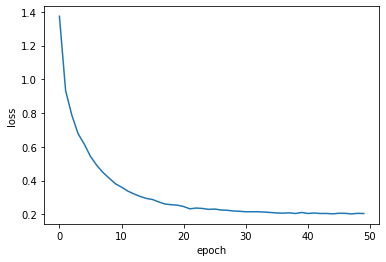

In [266]:
plt.plot(range(len(J)), J)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

label : 0
predict: 0


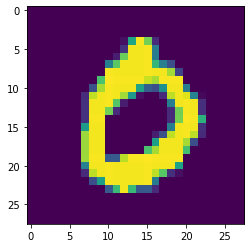

In [110]:
i=0
plt.imshow(X_test[i])
print("label :", np.where(y_test.transpose()[i]==1)[0][0])
num=np.array(X_test[i])
print("predict:", np.argmax(predict(num/255, theta1, theta2)))

predict: 3


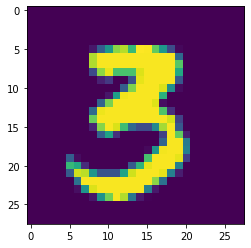

In [260]:
num=np.array(testset[3][122])
plt.imshow(num)
print("predict:", np.argmax(predict(num/255, theta1, theta2)))

In [261]:
#분류에 실패한 이미지의 인덱스

index=[]
for i in range(X_test.shape[0]):
    num =X_test[i]
    if(np.argmax(predict(num/255, theta1, theta2))!=np.where(y_test.transpose()[i]==1)[0][0]):
        index.append(i)

In [262]:
len(index) #10000개의 test dataset 중 278개

278

## 분류하지 못한 숫자 시각화

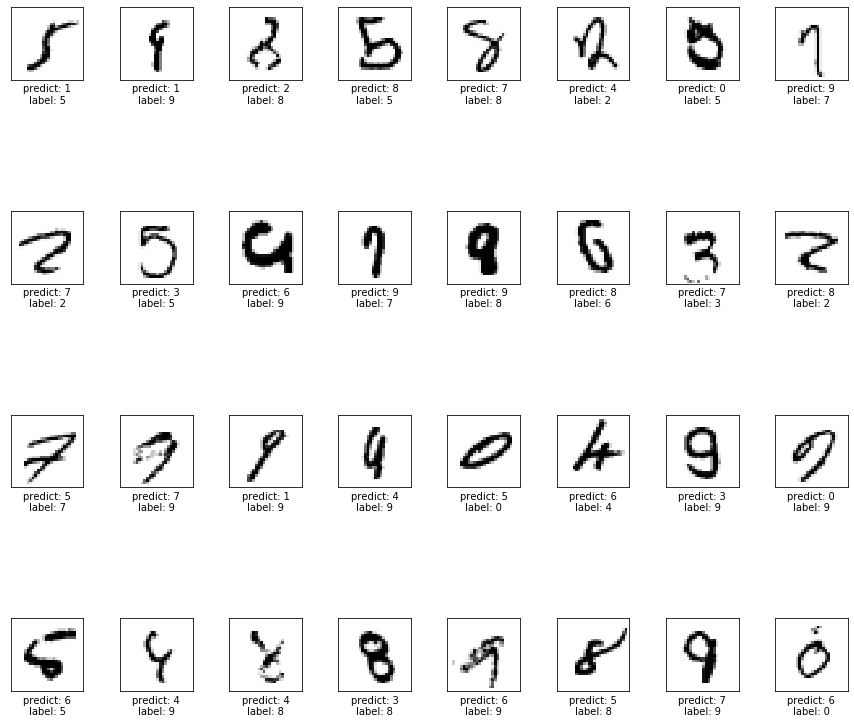

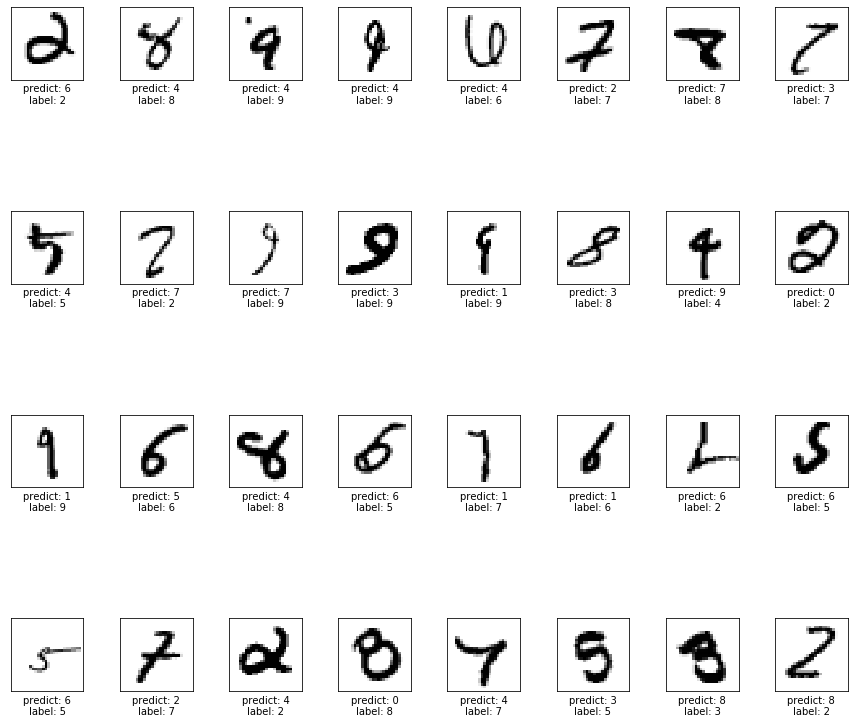

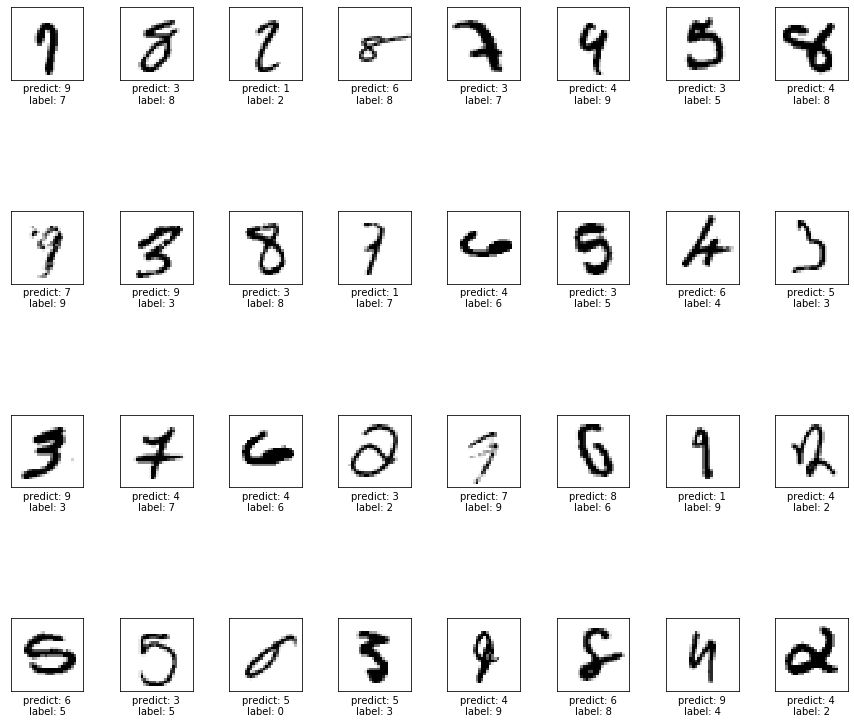

In [264]:
wspace=0.5
hspace=0

fig = plt.figure(figsize=(15,15))
c=0
for i in np.random.choice(len(index), 32, replace=False).reshape(32,):
    img = X_test[index[i]]
    c+=1
    fig.add_subplot(4,8,c)
    plt.imshow(img, cmap = cm.binary)
    plt.xlabel("predict: {}\nlabel: {}".format(np.argmax(predict(X_test[index[i]]/255, theta1, theta2)), np.where(y_test.transpose()[index[i]]==1)[0][0]))

    plt.xticks([], [])
    plt.yticks([], [])
    
plt.subplots_adjust(wspace=wspace, hspace=hspace)
plt.show()

fig = plt.figure(figsize=(15, 15))
c=0
for i in np.random.choice(len(index), 32, replace=False).reshape(32,):
    img = X_test[index[i]]
    c+=1
    fig.add_subplot(4,8,c)
    plt.imshow(img, cmap = cm.binary)
    plt.xlabel("predict: {}\nlabel: {}".format(np.argmax(predict(X_test[index[i]]/255, theta1, theta2)), np.where(y_test.transpose()[index[i]]==1)[0][0]))

    plt.xticks([], [])
    plt.yticks([], [])
    
plt.subplots_adjust(wspace=wspace, hspace=hspace)
plt.show()

fig = plt.figure(figsize=(15,15))
c=0
for i in np.random.choice(len(index), 32, replace=False).reshape(32,):
    img = X_test[index[i]]
    c+=1
    fig.add_subplot(4,8,c)
    plt.imshow(img, cmap = cm.binary)
    plt.xlabel("predict: {}\nlabel: {}".format(np.argmax(predict(X_test[index[i]]/255, theta1, theta2)), np.where(y_test.transpose()[index[i]]==1)[0][0]))

    plt.xticks([], [])
    plt.yticks([], [])
    
plt.subplots_adjust(wspace=wspace, hspace=hspace)
plt.show()

##### random하게 predict할 경우 약 10%의 정확도를 가져야 한다. (label이 10개이기 때문)

In [265]:
import random

res=[]
for i in range(X_test.shape[0]):
    num = X_test[i]
    res.append(np.argmax(predict(num/255, t1, t2))==random.randint(0, 9))

print("random accuracy : {:.2f}%".format(sum(res)/len(res)*100))

random accuracy : 9.82%


##### regularization하기 전의 accuracy

learning rate: 0.4, epoch: 150

In [96]:
res=[]
for i in range(X_train.shape[0]):
    num = X_train[i]
    res.append(np.argmax(predict(num/255, t1, t2))==np.where(y_train.transpose()[i]==1)[0][0])

print("train accuracy : {:.2f}%".format(sum(res)/len(res)*100))

res=[]
for i in range(X_test.shape[0]):
    num = X_test[i]
    res.append(np.argmax(predict(num/255, t1, t2))==np.where(y_test.transpose()[i]==1)[0][0])

print("test accuracy : {:.2f}%".format(sum(res)/len(res)*100))

train accuracy : 79.62%
test accuracy : 80.32%


##### regularization하기 전의 accuracy

learning rate: 100, epoch: 50

In [91]:
res=[]
for i in range(X_train.shape[0]):
    num = X_train[i]
    res.append(np.argmax(predict(num/255, theta1, theta2))==np.where(y_train.transpose()[i]==1)[0][0])

print("train accuracy : {:.2f}%".format(sum(res)/len(res)*100))

res=[]
for i in range(X_test.shape[0]):
    num = X_test[i]
    res.append(np.argmax(predict(num/255, theta1, theta2))==np.where(y_test.transpose()[i]==1)[0][0])

print("test accuracy : {:.2f}%".format(sum(res)/len(res)*100))

train accuracy : 99.12%
test accuracy : 96.45%


##### 약간의 overfitting이 의심이 되어 regularization또한 해보았다. 
##### regularization한 후의 accuracy

lambda: 0,1, learning rate: 100, epoch: 50

In [100]:
res=[]
for i in range(X_train.shape[0]):
    num = X_train[i]
    res.append(np.argmax(predict(num/255, theta1, theta2))==np.where(y_train.transpose()[i]==1)[0][0])

print("train accuracy : {:.2f}%".format(sum(res)/len(res)*100))

res=[]
for i in range(X_test.shape[0]):
    num = X_test[i]
    res.append(np.argmax(predict(num/255, theta1, theta2))==np.where(y_test.transpose()[i]==1)[0][0])

print("test accuracy : {:.2f}%".format(sum(res)/len(res)*100))

train accuracy : 98.13%
test accuracy : 97.22%


In [243]:
#save weights

import h5py

hf = h5py.File('Theta_100_reg.h5', 'w')
hf.create_dataset('theta1', data=theta1)
hf.create_dataset('theta2', data=theta2)

hf.close()

In [247]:
#load weights

hf = h5py.File('Theta_100_reg.h5', 'r')
hf.keys()
t1 = hf.get('theta1')
t2 = hf.get('theta2')

t1 = np.array(t1)
t2 = np.array(t2)
hf.close()

### 겪은 문제

relu랑 softmax 사용했더니 relu에서 값이 크게 나와서 softmax의 exponential의 인자로 큰 값이 들어오는 바람에 overflow 문제 발생
또한 softmax에서 0값이 출력되면 이후 cross entropy loss의 log에 인자로 0이 들어가서 underflow 발생

overflow의 경우 softmax에서 max값을 빼주는 방법을, underflow의 경우  cross entropy 연산 시 0에 가까운 1e-7값을 더해 보정해주는 방법으로 해결

### mlp architecture

mnist dataset으로 3 layers perceptron을 학습시켰다.

input layer의 unit 수는 784개(mnist 사진이 28X28임), hidden layer의 unit 수는 40개, output layer 수는 10개인 구조를 갖는다.  activation function으로는 relu, softmax를 사용하였고, optimizer로는 SGD를 사용하였다.

### conclusion & discussion

learning rate가 얼마인지에 따라서 수렴한다고 느끼는 구간이 다르다. learning rate가 0.01이었을 때는  2정도에서 수렴했다. 당연히 이때의 test accuracy는 30%정도로 턱없이 낮은 정확도였다. learning rate가 0.4였을 때는 0.5정도에서 수렴하였다. 이
때의 test accuracy는 약 80%정도였다. 무엇이 문제인지 모르고 있다가, learning rate를 100까지 대폭 올려서 학습한 결과, 수렴도 빨리되어서 epochs도 적게 학습을 하고, 이에따라 학습시간도 단축되었다. 이때 수렴은 약 0.01에서 이루어졌고, 정확도도 98%까지 도달했다. 

여기서 도출한 인사이트는 학습시간이 너무 길거나, 원하지 않는 곳에서 수렴을 할 경우, 알고리즘의 문제일 수도 있지만, learning rate가 올바른지부터 체크할 필요가 있다. 물론 learning rate가 아무리 작아도 epoch를 대폭 늘려서 끝까지 학습을 시키면 되겠지만, 시간적 비용을 고려한다면 가장 optimal한 learning rate를 찾을 필요가 있다.

이렇게 중요한것이 당연하지만 상대적으로 중요치 않게 여겨지는 learning rate에 대한 연구가 있을 것이라 생각된다. 구글에서 찾아보면 learning rate는 그때그때 비교적 적합한 값을 찾아야 한다는 의견이 많다. 하지만, 가중치 값들의 범위와 가중치들의 gradient의 값들의 범위를 고려하여 optimal한 learning rate를 자동으로 찾는 연구도 추후해 한다면 좋을 것 같다.